# Plotting the output from Cumulative event counter

### Shortened notebook just for plotting

1. ~Load dictionary of apoptoses and their corresponding times to base the spatiotemporal scans around~ 
2. ~Load corresponding tracking data and specify scan parameters~
3. ~Iteratively calculate spatiotemporal distribution of cellular events around apoptoses, saving each distribution out as a .npy distance-time heatmap~
4. **Compile list of spatiotemporal heatmaps as cumulative heatmap**
5. ~Misc. section: comparing different experimental conditions~

In [1]:
import calculate_radial_analysis as calculate
import tools
import render

import json
import glob
import os
import re
import numpy as np
from natsort import natsorted
from tqdm import tqdm
import matplotlib.pyplot as plt
from pathlib import Path

# Set parameters

In [2]:
#params = {}
num_bins = 10
radius = 400
t_range = 400

focal_cell = 'Scr'#'WT'
focal_event = 'APOPTOSIS'#'APOPTOSIS'
subject_cell = 'WT' #'WT'
subject_event = 'DIVISION'

save_parent_dir = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/cumulative_plots/scr_apop_wt_div'
single_cell_heatmap_location = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/individual_spatiotemporal_heatmaps/400.400.10/scr_apop_wt_div'

# Automatically read parameters from input directory

In [13]:
single_cell_heatmap_location = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/individual_spatiotemporal_heatmaps/400.400.10/wt_control_scr_div'

analysis_info = single_cell_heatmap_location.split('individual_spatiotemporal_heatmaps/')[1]

radius, t_range, num_bins = list(map(int,analysis_info.split('/')[0].split('.') ))

focal_cell, focal_event , subject_cell, subject_event = analysis_info.split('/')[1].split('_')

save_parent_dir = os.path.join('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/cbar_lim_0.00025')

## 4) Compile individual heatmaps into cumulative plots 

Compile cumulative heatmap by iteratively adding single-apoptosis heatmaps from previous output or different pre-established output 

In [14]:
N_cells, N_events = np.zeros((num_bins, num_bins)), np.zeros((num_bins, num_bins))
N = 0
for heatmap_ID in natsorted(os.listdir(single_cell_heatmap_location)):
    if 'N_cells' in heatmap_ID:
        N_cells += np.load(os.path.join(single_cell_heatmap_location,heatmap_ID))
    if 'N_events' in heatmap_ID:
        N_events += np.load(os.path.join(single_cell_heatmap_location,heatmap_ID))
        N+=1
P_events = N_events/N_cells
N

3750

In [15]:
print("The number of {} cells counted is equal to = ".format(subject_cell), N_cells.sum())

The number of scr cells counted is equal to =  7431330.0


Function to plot heatmaps: 

`render.auto_plot_cumulative(input_2d_hist, input_type, num_bins, radius, t_range, title, expt_label, cb_label, save_path, SI = True)`

Where the variables needed are as follows:

- `input_2d_hist` = Input 2D histogram
- `input_type` = String version of input variable name
- `num_bins` = Number of bins the histogram is sorted into
- `radius` = Spatial extent of scan
- `t_range` = Temporal range of scan
- `focal_cell` = Cell type that is the focal point of the scan 
- `focal_event` = Event type that is the focal point of the scan 
- `subject_cell` = Cell type that is scanned over
- `subject_event` = Event type that is the scanned over 
- `save_parent_dir` = Root directory into which different plots will be saved according to scan parameters, if empty then plots not saved out 
- `cbar_lim` = Tuple that is the limits of the colorbar, if left blank then will be automatically decided
- `SI` = If True then plots the xy in SI base unit instead of pixel/frames

Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/cbar_lim_0.00025/400.400.10/wt_cont_scr_div/Spatiotemporal dist. of probability of Scribble divisions 
 around wild-type random time points (N=3750).pdf


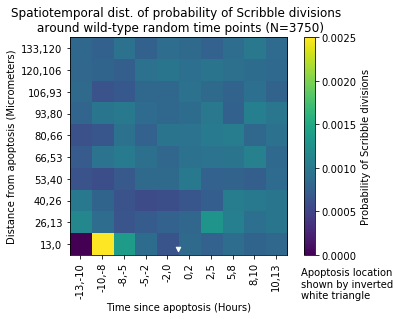

In [16]:
render.auto_plot_cumulative(P_events,
                     'P_events',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      focal_cell, 
                      focal_event, 
                      subject_cell, 
                      subject_event, 
                      save_parent_dir ,
                      (0, 0.0025),
                      SI = True)

# Completely automated cumulative graph generation from single cell graph directory

# New plot that shows many arrays randomly sampled from cumulative array 

In [13]:
array1 = np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0794_Pos4_70_RFP_N_cells.npy')

In [14]:
array2 = np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0794_Pos6_8_RFP_N_cells.npy')

In [31]:
combined_array = array1*array2


In [33]:
arrays = [array1, array2]

In [37]:
for array in arrays:
    for i in array:
        for j in i:
            if j == np.nan:
                continue
            else:
                print(j)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
20.0
7.0
nan
nan
nan
nan
nan
nan
nan
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
92.0
83.0
79.0
nan
nan
nan
nan
nan
nan
nan
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
29.0
49.0
76.0
142.0
167.0
nan
nan
nan
nan
nan
nan
nan
0.0
0.0
0.0
0.0
0.0
0.0
0.0
32.0
65.0
71.0
105.0
69.0
181.0
nan
nan
nan
nan
nan
nan
nan
0.0
0.0
0.0
0.0
0.0
0.0
3.0
35.0
79.0
87.0
69.0
207.0
235.0
nan
nan
nan
nan
nan
nan
nan
0.0
0.0
0.0
0.0
0.0
0.0
14.0
37.0
55.0
163.0
288.0
254.0
233.0
nan
nan
nan
nan
nan
nan
nan
0.0
0.0
1.0
0.0
18.0
40.0
71.0
109.0
231.0
274.0
291.0
292.0
298.0
nan
nan
nan
nan
nan
nan
nan
40.0
40.0
41.0
82.0
72.0
89.0
119.0
136.0
268.0
264.0
301.0
284.0
208.0
nan
nan
nan
nan
nan
nan
nan
49.0
80.0
75.0
68.0
99.0
65.0
114.0
201.0
200.0
209.0
244.0
251.0
245.0
nan
nan
nan
nan
nan
nan
nan
71.0
78.0
78.0
162.0
162.0
147.0
186.0
199.0
131.0
155.0
232.0
216.0
217.0
nan
nan
nan
nan
nan
nan
nan
123.0
82.0
100.0
128.0
161.0
237.0
247.0
249.0
272.0
254.0
299.0
306.0
171.0
nan
nan

Text(0.5, 1.0, 'combined')

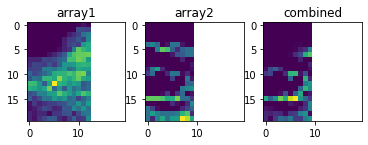

In [32]:
fig = plt.figure()
a = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(array1)
a.set_title('array1')
a = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(array2)
a.set_title('array2')
a = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(combined_array)
a.set_title('combined')